# Multi-path exploration

In [1]:
import sys
sys.path.append('../')
from panav.viz import draw_env
from panav.multi_path import explore_multi_path
from panav.env import NavigationEnv,box_2d_center,Box2DRegion

import numpy as np
from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2

# Empty Environment

In [2]:

# 2D navigation environment

start_box_side = np.array([1,1])
goal_box_side = np.array([1,1])

top, bottom = 9,-9
start_x_offset = 7
goal_x_offset = 9
N = 4

start_locs = np.vstack([
np.vstack([np.ones(N)*start_x_offset,np.linspace(top,bottom, N)]).T,
np.vstack([np.ones(N)*(-start_x_offset),np.linspace(top,bottom, N)]).T])

goal_locs = np.vstack([
np.vstack([np.ones(N)*(-goal_x_offset),np.linspace(bottom,top, N)]).T,
np.vstack([np.ones(N)*goal_x_offset,np.linspace(bottom,top, N)]).T])


starts = [box_2d_center(s,start_box_side) for s in start_locs]
goals = [box_2d_center(g,goal_box_side) for g in goal_locs]

starts = [starts[0]]
goals = [goals[0]]
start = np.array(list(starts[0].centroid().coords)[0])
goal = np.array(list(goals[0].centroid().coords)[0])

limits = [(-10.0,10.0),(-10.0,10.0)]

# Construct the hybrid graph representation of the environment
bloating_r = 0.5 
env = NavigationEnv(limits,[],starts,goals)

In [3]:
paths = explore_multi_path(env,start,goal)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-02-15


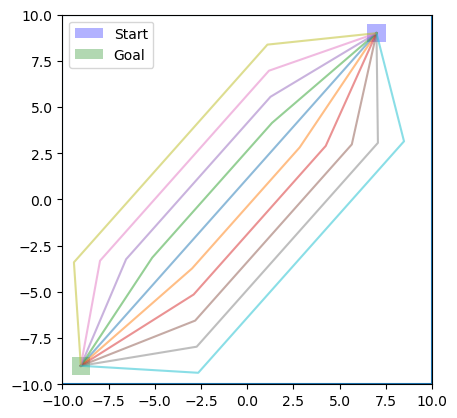

In [4]:
ax = plt.gca()
draw_env(env,paths, ax)
plt.show()    


## Double tunnel

In [5]:

O1 = Box2DRegion((-2.5,2.5),(0.5,10))
O2 = Box2DRegion((-2.5,2.5),(-3,-1.0))
O3 = Box2DRegion((-2.5,2.5),(-10.0,-4.0))
env = NavigationEnv(limits,[O1,O2,O3],starts,goals)

In [6]:
paths = explore_multi_path(env,start,goal)

/Users/tianpengzhang/opt/miniconda3/envs/PA-Nav/lib/python3.11/site-packages/cvxpy/problems/problem.py:1391: UserWarning: 
    The problem is either infeasible or unbounded, but the solver
    cannot tell which. Disable any solver-specific presolve methods
    and re-solve to determine the precise problem status.

    For GUROBI and CPLEX you can automatically perform this re-solve
    with the keyword argument prob.solve(reoptimize=True, ...).
    
  warnings.warn(INF_OR_UNB_MESSAGE)


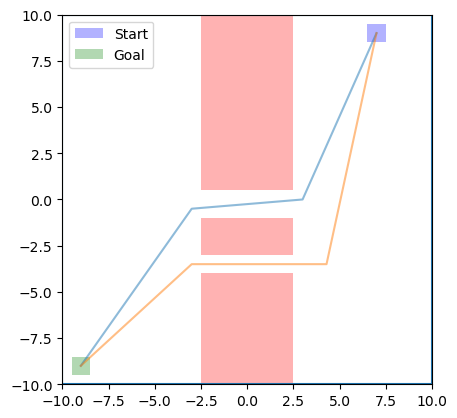

In [7]:
ax = plt.gca()
draw_env(env,paths, ax)
plt.show()    


# Single Tunnel

In [8]:

O1 = Box2DRegion((-2.5,2.5),(0.5,10))
O2 = Box2DRegion((-2.5,2.5),(-10,-1.0))
env = NavigationEnv(limits,[O1,O2],starts,goals)

In [9]:
paths = explore_multi_path(env,start,goal)

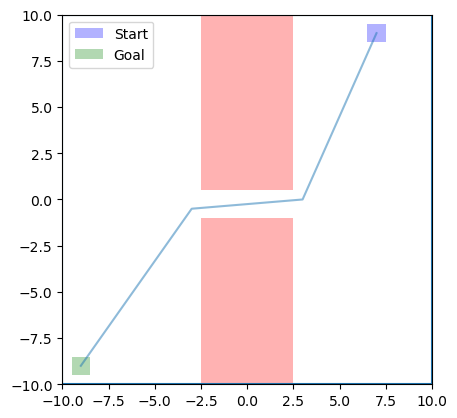

In [10]:
ax = plt.gca()
draw_env(env,paths, ax)
plt.show()    


# Unicorn

In [11]:
from panav.env import PolygonRegion
o1 = Box2DRegion((-2.5,2.5),(2.5,5))
o2 = Box2DRegion((-2.5,2.5),(-5,-2.5))
o3 = PolygonRegion([(3.0,1.0),(3.0,-1.0),(7.5,0)])

obstacles = [o1,o2,o3]
env = NavigationEnv(limits,obstacles,starts,goals)

In [12]:
paths = explore_multi_path(env,start,goal)

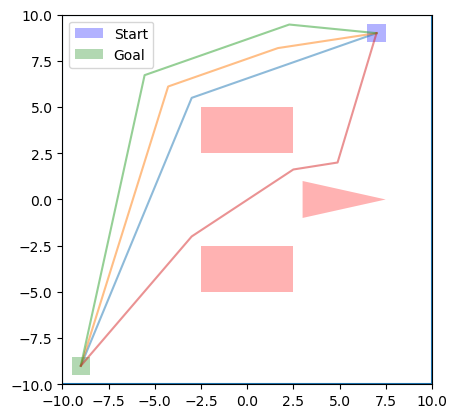

In [13]:
ax = plt.gca()
draw_env(env,paths, ax)
plt.show()    


# Circles

In [19]:
from panav.env import approxCircle
obstacles = []
R = 4

obstacles += approxCircle(np.array([0,5.0]),R)
obstacles += approxCircle(np.array([0,-5]),R)

env = NavigationEnv(limits,obstacles,starts,goals)

In [20]:
paths = explore_multi_path(env,start,goal)

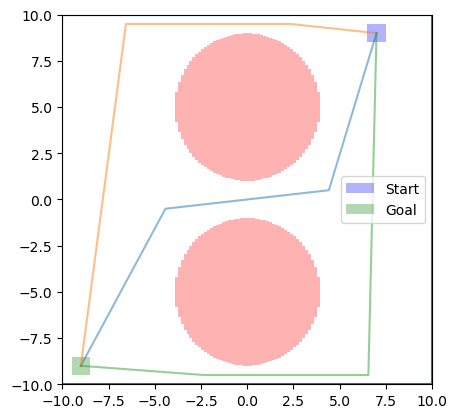

In [21]:
ax = plt.gca()
draw_env(env,paths, ax)
plt.show()    
